# Artificial Intelligence Nanodegree

## Convolutional Neural Networks

---

In this notebook, we train an MLP to classify images from the MNIST database.

### 1. Load MNIST Database

In [1]:
EPOCHS = 10

from keras.datasets import mnist

# use Keras to import pre-shuffled MNIST database
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("The MNIST database has a training set of %d examples." % len(X_train))
print("The MNIST database has a test set of %d examples." % len(X_test))

Using TensorFlow backend.


The MNIST database has a training set of 60000 examples.
The MNIST database has a test set of 10000 examples.


### 2. Visualize the First Six Training Images

In [2]:
print(10000/70000)

0.14285714285714285


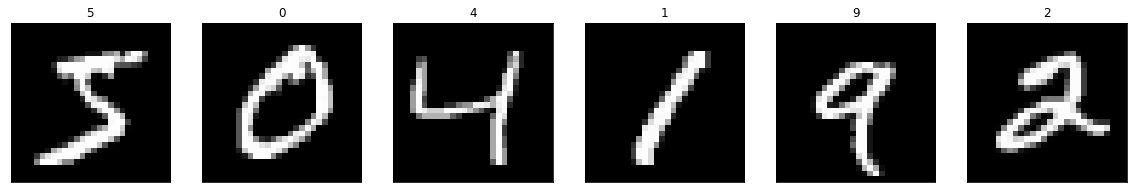

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
import numpy as np

# plot first six training images
fig = plt.figure(figsize=(20,20))
for i in range(6):
    ax = fig.add_subplot(1, 6, i+1, xticks=[], yticks=[])
    ax.imshow(X_train[i], cmap='gray')
    ax.set_title(str(y_train[i]))

### 3. View an Image in More Detail

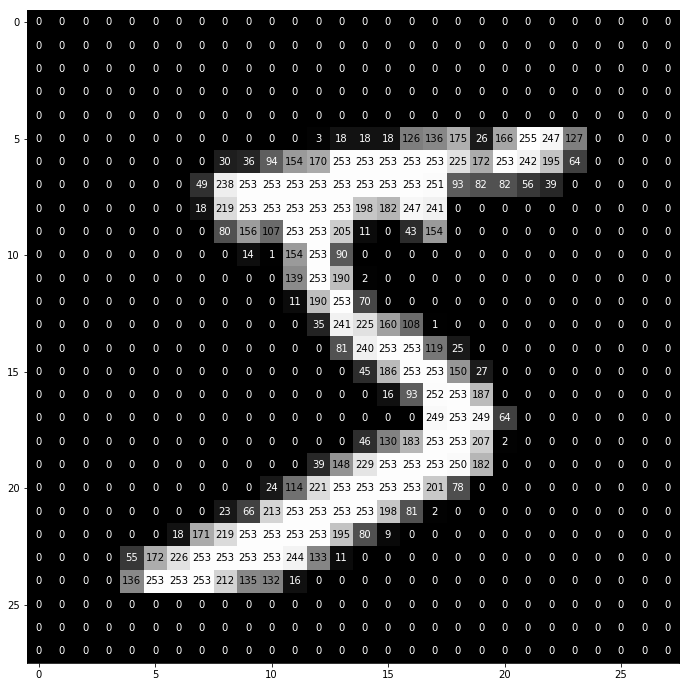

In [4]:
def visualize_input(img, ax):
    ax.imshow(img, cmap='gray')
    width, height = img.shape
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y],2)), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img[x][y]<thresh else 'black')

fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)
visualize_input(X_train[0], ax)

### 4. Rescale the Images by Dividing Every Pixel in Every Image by 255

In [5]:
# rescale [0,255] --> [0,1]
X_train_raw = X_train
X_test_raw = X_test
X_train = X_train.astype('float32')/255
X_test  = X_test.astype('float32')/255 

### 5. Encode Categorical Integer Labels Using a One-Hot Scheme

In [6]:
from keras.utils import np_utils

# print first ten (integer-valued) training labels
print('Integer-valued labels:')
print(y_train[:10])

# one-hot encode the labels
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

# print first ten (one-hot) training labels
print('One-hot labels:')
print(y_train[:10])

Integer-valued labels:
[5 0 4 1 9 2 1 3 1 4]
One-hot labels:
[[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]]


### 6. Define the Model Architecture

In [7]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten

# define the model
model = Sequential()
model.add(Flatten(input_shape=X_train.shape[1:]))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

# summarize the model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706.0
Trainable params: 669,706.0
Non-trainable params: 0.0
________________________________________________________________

### 7. Compile the Model

In [8]:
# compile the model
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
              metrics=['accuracy'])

### 8. Calculate the Classification Accuracy on the Test Set (Before Training)

In [9]:
# evaluate test accuracy
score = model.evaluate(X_test, y_test, verbose=0)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)

Test accuracy: 11.2900%


### 9. Train the Model

In [10]:
from keras.callbacks import ModelCheckpoint   

# train the model
checkpointer = ModelCheckpoint(filepath='mnist.model.best.hdf5', 
                               verbose=0, save_best_only=True)
hist = model.fit(X_train, y_train, batch_size=128, epochs=EPOCHS,
          validation_split=0.2, callbacks=[checkpointer],
          verbose=0, shuffle=True)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 11s - loss: 0.2725 - acc: 0.9160 - val_loss: 0.1327 - val_acc: 0.9583
Epoch 2/10
48000/48000 [==============================] - 11s - loss: 0.1111 - acc: 0.9660 - val_loss: 0.1057 - val_acc: 0.9678
Epoch 3/10
48000/48000 [==============================] - 10s - loss: 0.0789 - acc: 0.9755 - val_loss: 0.0850 - val_acc: 0.9761
Epoch 4/10
48000/48000 [==============================] - 11s - loss: 0.0599 - acc: 0.9814 - val_loss: 0.0831 - val_acc: 0.9782
Epoch 5/10
48000/48000 [==============================] - 11s - loss: 0.0497 - acc: 0.9847 - val_loss: 0.0896 - val_acc: 0.9773
Epoch 6/10
48000/48000 [==============================] - 11s - loss: 0.0432 - acc: 0.9866 - val_loss: 0.0965 - val_acc: 0.9760
Epoch 7/10
48000/48000 [==============================] - 11s - loss: 0.0384 - acc: 0.9887 - val_loss: 0.0970 - val_acc: 0.9755
Epoch 8/10
48000/48000 [==============================

### 10. Load the Model with the Best Classification Accuracy on the Validation Set

In [11]:
# load the weights that yielded the best validation accuracy
model.load_weights('mnist.model.best.hdf5')

### 11. Calculate the Classification Accuracy on the Test Set

In [12]:
# evaluate test accuracy
score = model.evaluate(X_test, y_test, verbose=0)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)

Test accuracy: 97.8800%


# Own Models

### Base Model

In [13]:
model = Sequential()
model.add(Flatten(input_shape=X_train.shape[1:]))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

# summarize the model
model.summary()

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
              metrics=['accuracy'])

checkpointer = ModelCheckpoint(filepath='mnist.model.best.hdf5', 
                               verbose=0, save_best_only=True)
hist = model.fit(X_train, y_train, batch_size=128, epochs=EPOCHS,
          validation_split=0.2, callbacks=[checkpointer],
          verbose=0, shuffle=True)

model.load_weights('mnist.model.best.hdf5')

# evaluate test accuracy
score = model.evaluate(X_test, y_test, verbose=0)
base_model_accuracy = 100*score[1]

# print test accuracy
print('Base Model Test accuracy:%.4f%%' % base_model_accuracy)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                5130      
Total params: 669,706.0
Trainable params: 669,706.0
Non-trainable params: 0.0
________________________________________________________________

### Increase (or decrease) number of nodes in each of the hidden layers. Evidence of over- or underfitting?

In [14]:
model = Sequential()
model.add(Flatten(input_shape=X_train.shape[1:]))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

# summarize the model
model.summary()

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
              metrics=['accuracy'])

checkpointer = ModelCheckpoint(filepath='mnist.model.best.hdf5', 
                               verbose=0, save_best_only=True)
hist = model.fit(X_train, y_train, batch_size=128, epochs=EPOCHS,
          validation_split=0.2, callbacks=[checkpointer],
          verbose=0, shuffle=True)

model.load_weights('mnist.model.best.hdf5')

# evaluate test accuracy
score = model.evaluate(X_test, y_test, verbose=0)
thinner_model_accuracy = 100*score[1]

model = Sequential()
model.add(Flatten(input_shape=X_train.shape[1:]))
model.add(Dense(768, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

# summarize the model
model.summary()

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
              metrics=['accuracy'])

checkpointer = ModelCheckpoint(filepath='mnist.model.best.hdf5', 
                               verbose=0, save_best_only=True)
hist = model.fit(X_train, y_train, batch_size=128, epochs=EPOCHS,
          validation_split=0.2, callbacks=[checkpointer],
          verbose=0, shuffle=True)

model.load_weights('mnist.model.best.hdf5')

# evaluate test accuracy
score = model.evaluate(X_test, y_test, verbose=0)
thicker_model_accuracy = 100*score[1]

# print test accuracy
print('Base Model Test accuracy:   %.4f%%' % base_model_accuracy)
print('Thinner Model Test accuracy:%.4f%%' % thinner_model_accuracy)
print('Thicker Model Test accuracy:%.4f%%' % thicker_model_accuracy)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_6 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                650       
Total params: 109,386.0
Trainable params: 109,386.0
Non-trainable params: 0.0
________________________________________________________________

### Increase (or decrease) number of hidden layers. Evidence of over- or underfitting?

In [15]:
model = Sequential()
model.add(Flatten(input_shape=X_train.shape[1:]))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
#model.add(Dense(512, activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

# summarize the model
model.summary()

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
              metrics=['accuracy'])

checkpointer = ModelCheckpoint(filepath='mnist.model.best.hdf5', 
                               verbose=0, save_best_only=True)
hist = model.fit(X_train, y_train, batch_size=128, epochs=EPOCHS,
          validation_split=0.2, callbacks=[checkpointer],
          verbose=0, shuffle=True)

model.load_weights('mnist.model.best.hdf5')

# evaluate test accuracy
score = model.evaluate(X_test, y_test, verbose=0)
shallower_model_accuracy = 100*score[1]

model = Sequential()
model.add(Flatten(input_shape=X_train.shape[1:]))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(10, activation='softmax'))

# summarize the model
model.summary()

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
              metrics=['accuracy'])

checkpointer = ModelCheckpoint(filepath='mnist.model.best.hdf5', 
                               verbose=0, save_best_only=True)
hist = model.fit(X_train, y_train, batch_size=128, epochs=EPOCHS,
          validation_split=0.2, callbacks=[checkpointer],
          verbose=0, shuffle=True)

model.load_weights('mnist.model.best.hdf5')

# evaluate test accuracy
score = model.evaluate(X_test, y_test, verbose=0)
deeper_model_accuracy = 100*score[1]
# print test accuracy
print('Base Model Test accuracy:    %.4f%%' % base_model_accuracy)
print('Thinner Model Test accuracy: %.4f%%' % thinner_model_accuracy)
print('Thicker Model Test accuracy: %.4f%%' % thicker_model_accuracy)
print('Shallower Model accuracy:    %.4f%%' % shallower_model_accuracy)
print('Deeper Model accuracy:       %.4f%%' % deeper_model_accuracy)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_9 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 10)                5130      
Total params: 407,050.0
Trainable params: 407,050.0
Non-trainable params: 0.0
_________________________________________________________________
Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 7s - loss: 0.3052 - acc: 0.9112 - val_loss: 0.1549 - val_acc: 0.9553
Epoch 2/10
48000/48000 [==============================] - 7s - loss: 0.1337 - acc: 0.

### Remove the dropout layers. Evidence of over- or underfitting?

In [16]:
model = Sequential()
model.add(Flatten(input_shape=X_train.shape[1:]))
model.add(Dense(512, activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

# summarize the model
model.summary()

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
              metrics=['accuracy'])

checkpointer = ModelCheckpoint(filepath='mnist.model.best.hdf5', 
                               verbose=0, save_best_only=True)
hist = model.fit(X_train, y_train, batch_size=128, epochs=EPOCHS,
          validation_split=0.2, callbacks=[checkpointer],
          verbose=0, shuffle=True)

model.load_weights('mnist.model.best.hdf5')

# evaluate test accuracy
score = model.evaluate(X_test, y_test, verbose=0)
no_dropout_model_accuracy = 100*score[1]

# print test accuracy
print('Base Model Test accuracy:      %.4f%%' % base_model_accuracy)
print('Thinner Model Test accuracy:   %.4f%%' % thinner_model_accuracy)
print('Thicker Model Test accuracy:   %.4f%%' % thicker_model_accuracy)
print('Shallower Model accuracy:      %.4f%%' % shallower_model_accuracy)
print('Deeper Model accuracy:         %.4f%%' % deeper_model_accuracy)
print('No Dropout Model Test accuracy:%.4f%%' % no_dropout_model_accuracy)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_20 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_21 (Dense)             (None, 10)                5130      
Total params: 669,706.0
Trainable params: 669,706.0
Non-trainable params: 0.0
_________________________________________________________________
Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 8s - loss: 0.2414 - acc: 0.9250 - val_loss: 0.1056 - val_acc: 0.9681
Epoch 2/10
48000/48000 [==============================] - 7s - loss: 0.0894 - acc: 0.

### Remove ReLU activation. Does the accurady decrease?

In [17]:
model = Sequential()
model.add(Flatten(input_shape=X_train.shape[1:]))
model.add(Dense(512))
model.add(Dropout(0.2))
model.add(Dense(512))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

# summarize the model
model.summary()

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
              metrics=['accuracy'])

checkpointer = ModelCheckpoint(filepath='mnist.model.best.hdf5', 
                               verbose=0, save_best_only=True)
hist = model.fit(X_train, y_train, batch_size=128, epochs=EPOCHS,
          validation_split=0.2, callbacks=[checkpointer],
          verbose=0, shuffle=True)

model.load_weights('mnist.model.best.hdf5')

# evaluate test accuracy
score = model.evaluate(X_test, y_test, verbose=0)
no_activation_model_accuracy = 100*score[1]

# print test accuracy
print('Base Model Test accuracy:         %.4f%%' % base_model_accuracy)
print('Thinner Model Test accuracy:      %.4f%%' % thinner_model_accuracy)
print('Thicker Model Test accuracy:      %.4f%%' % thicker_model_accuracy)
print('Shallower Model accuracy:         %.4f%%' % shallower_model_accuracy)
print('Deeper Model accuracy:            %.4f%%' % deeper_model_accuracy)
print('No Dropout Model Test accuracy:   %.4f%%' % no_dropout_model_accuracy)
print('No Activation Model Test accuracy:%.4f%%' % no_activation_model_accuracy)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_8 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_13 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_14 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 10)                5130      
Total params: 669,706.0
Trainable params: 669,706.0
Non-trainable params: 0.0
________________________________________________________________

### Remove the image pre-processing (normalisation of pixel values). Does the accuracy decrease?

In [ ]:
model = Sequential()
model.add(Flatten(input_shape=X_train.shape[1:]))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

# summarize the model
model.summary()

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
              metrics=['accuracy'])

checkpointer = ModelCheckpoint(filepath='mnist.model.best.hdf5', 
                               verbose=0, save_best_only=True)
hist = model.fit(X_train_raw, y_train, batch_size=128, epochs=EPOCHS,
          validation_split=0.2, callbacks=[checkpointer],
          verbose=0, shuffle=True)

model.load_weights('mnist.model.best.hdf5')

# evaluate test accuracy
score = model.evaluate(X_test_raw, y_test, verbose=0)
raw_model_accuracy = 100*score[1]

# print test accuracy
print('Base Model Test accuracy:         %.4f%%' % base_model_accuracy)
print('Thinner Model Test accuracy:      %.4f%%' % thinner_model_accuracy)
print('Thicker Model Test accuracy:      %.4f%%' % thicker_model_accuracy)
print('Shallower Model accuracy:         %.4f%%' % shallower_model_accuracy)
print('Deeper Model accuracy:            %.4f%%' % deeper_model_accuracy)
print('No Dropout Model Test accuracy:   %.4f%%' % no_dropout_model_accuracy)
print('No Activation Model Test accuracy:%.4f%%' % no_activation_model_accuracy)
print('Raw Model Test accuracy:          %.4f%%' % raw_model_accuracy)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_9 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_15 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_16 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 10)                5130      
Total params: 669,706.0
Trainable params: 669,706.0
Non-trainable params: 0.0
________________________________________________________________

### Try a different optimizer.

In [ ]:
OPTIMIZERS = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
results = []

for optimizer in OPTIMIZERS:
    
    model = Sequential()
    model.add(Flatten(input_shape=X_train.shape[1:]))
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(10, activation='softmax'))

    # summarize the model
    #model.summary()

    model.compile(loss='categorical_crossentropy', optimizer=optimizer, 
                  metrics=['accuracy'])

    checkpointer = ModelCheckpoint(filepath='mnist.model.best.hdf5', 
                                   verbose=0, save_best_only=True)
    hist = model.fit(X_train, y_train, batch_size=128, epochs=EPOCHS,
              validation_split=0.2, callbacks=[checkpointer],
              verbose=0, shuffle=True)

    model.load_weights('mnist.model.best.hdf5')

    # evaluate test accuracy
    score = model.evaluate(X_test, y_test, verbose=0)
    accuracy = 100*score[1]
    results.append("%24s accuracy %.4f%%" % (optimizer + "Model", accuracy))

# print test accuracy
print('Base Model Test accuracy:         %.4f%%' % base_model_accuracy)
print('Thinner Model Test accuracy:      %.4f%%' % thinner_model_accuracy)
print('Thicker Model Test accuracy:      %.4f%%' % thicker_model_accuracy)
print('Shallower Model accuracy:         %.4f%%' % shallower_model_accuracy)
print('Deeper Model accuracy:            %.4f%%' % deeper_model_accuracy)
print('No Dropout Model Test accuracy:   %.4f%%' % no_dropout_model_accuracy)
print('No Activation Model Test accuracy:%.4f%%' % no_activation_model_accuracy)
print('Raw Model Test accuracy:          %.4f%%' % raw_model_accuracy)

for result in results:
    print(result)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 8s - loss: 1.3745 - acc: 0.6372 - val_loss: 0.6388 - val_acc: 0.8608
Epoch 2/10
48000/48000 [==============================] - 7s - loss: 0.6078 - acc: 0.8332 - val_loss: 0.4136 - val_acc: 0.8941
Epoch 3/10
48000/48000 [==============================] - 7s - loss: 0.4755 - acc: 0.8644 - val_loss: 0.3476 - val_acc: 0.9057
Epoch 4/10
48000/48000 [==============================] - 7s - loss: 0.4134 - acc: 0.8824 - val_loss: 0.3138 - val_acc: 0.9135
Epoch 5/10
48000/48000 [==============================] - 7s - loss: 0.3767 - acc: 0.8921 - val_loss: 0.2909 - val_acc: 0.9180
Epoch 6/10
48000/48000 [==============================] - 7s - loss: 0.3504 - acc: 0.8991 - val_loss: 0.2737 - val_acc: 0.9218
Epoch 7/10
48000/48000 [==============================] - 7s - loss: 0.3310 - acc: 0.9032 - val_loss: 0.2601 - val_acc: 0.9259
Epoch 8/10
48000/48000 [==============================] - 7s 

### Increase or decrease the batch size.

In [ ]:
BATCH_SIZES = [16, 32, 64, 128, 256, 512, 1024, 2048]
#results = []

for batch_size in BATCH_SIZES:
    
    model = Sequential()
    model.add(Flatten(input_shape=X_train.shape[1:]))
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(10, activation='softmax'))

    # summarize the model
    #model.summary()

    model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
                  metrics=['accuracy'])

    checkpointer = ModelCheckpoint(filepath='mnist.model.best.hdf5', 
                                   verbose=0, save_best_only=True)
    hist = model.fit(X_train, y_train, batch_size=batch_size, epochs=EPOCHS,
              validation_split=0.2, callbacks=[checkpointer],
              verbose=0, shuffle=True)

    model.load_weights('mnist.model.best.hdf5')

    # evaluate test accuracy
    score = model.evaluate(X_test, y_test, verbose=0)
    accuracy = 100*score[1]
    results.append("%24s accuracy %.4f%%" % (str(batch_size) + " bsize model", accuracy))

# print test accuracy
print('Base Model Test accuracy:         %.4f%%' % base_model_accuracy)
print('Thinner Model Test accuracy:      %.4f%%' % thinner_model_accuracy)
print('Thicker Model Test accuracy:      %.4f%%' % thicker_model_accuracy)
print('Shallower Model accuracy:         %.4f%%' % shallower_model_accuracy)
print('Deeper Model accuracy:            %.4f%%' % deeper_model_accuracy)
print('No Dropout Model Test accuracy:   %.4f%%' % no_dropout_model_accuracy)
print('No Activation Model Test accuracy:%.4f%%' % no_activation_model_accuracy)
print('Raw Model Test accuracy:          %.4f%%' % raw_model_accuracy)

for result in results:
    print(result)

48000/48000 [==============================] - 58s - loss: 0.1867 - acc: 0.9606 - val_loss: 0.1505 - val_acc: 0.9691
Epoch 3/10
48000/48000 [==============================] - 58s - loss: 0.1855 - acc: 0.9655 - val_loss: 0.2740 - val_acc: 0.9573
Epoch 4/10
48000/48000 [==============================] - 55s - loss: 0.1894 - acc: 0.9690 - val_loss: 0.2063 - val_acc: 0.9691
Epoch 5/10
48000/48000 [==============================] - 48s - loss: 0.1809 - acc: 0.9720 - val_loss: 0.1869 - val_acc: 0.9726
Epoch 6/10
48000/48000 [==============================] - 47s - loss: 0.1766 - acc: 0.9744 - val_loss: 0.2162 - val_acc: 0.9712
Epoch 7/10
48000/48000 [==============================] - 46s - loss: 0.1802 - acc: 0.9755 - val_loss: 0.2142 - val_acc: 0.9746
Epoch 8/10
48000/48000 [==============================] - 49s - loss: 0.1846 - acc: 0.9767 - val_loss: 0.2482 - val_acc: 0.9721
Epoch 9/10
48000/48000 [==============================] - 47s - loss: 0.1819 - acc: 0.9769 - val_loss: 0.2133 - val